In [1]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
    include("/home/sergey/work/repo/dynamical-systems/system.jl")
end

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


jac_FHN (generic function with 1 method)

In [2]:
using JLD2, CairoMakie, MAT

In [3]:
cd("/home/sergey/work/repo/dynamical-systems/brain rhythms")
len = 100
map_dim = " $(len)x$(len) "
name = " γY s0E rate_model params from TG RK4"
format = ".jld2"
namefile_LSE = "LSE" * map_dim * name * format
namefile_u0s = "u0s" * map_dim * name * format

Λs =  load("/home/sergey/work/repo/dynamical-systems/LSE 100x100  γY s0E rate_model params from tg RK4 ubuntu.jld2")
#load(namefile_LSE)
Λs = Λs["Λs"]
#u0s = load(namefile_u0s)
#u0s = u0s["u0s"]

γYrange = range( 0.0, 10.0, length = len );
s0Erange =  range(0.0, 0.5, length = len);

In [4]:
cd("/home/sergey/MEGA/MatCont7p4/Systems/rate_model/diagram")
Hopf_forward = matopen("GammaY_s0E_hopf_forward.mat")
Hopf_forward = read(Hopf_forward, "x")
Hopf_backward = matopen("GammaY_s0E_hopf_backward.mat")
Hopf_backward = read(Hopf_backward, "x")

8×97 Matrix{Float64}:
 0.367801     0.367793     0.367783     …  -0.0493333    -0.0698303
 0.594163     0.594153     0.59414          0.135524      0.125186
 0.00726386   0.00726463   0.00726563       0.320507      0.299079
 0.152205     0.152198     0.152189         0.00513669    0.00359879
 1.81422e-10  1.81277e-10  1.81087e-10      1.38918e-28   1.78889e-29
 0.314758     0.31475      0.314741     …  -0.148871     -0.172358
 5.0          4.999        4.9977          -2.45274      -2.43654
 0.106068     0.106068     0.106067         0.0164169     0.0114533

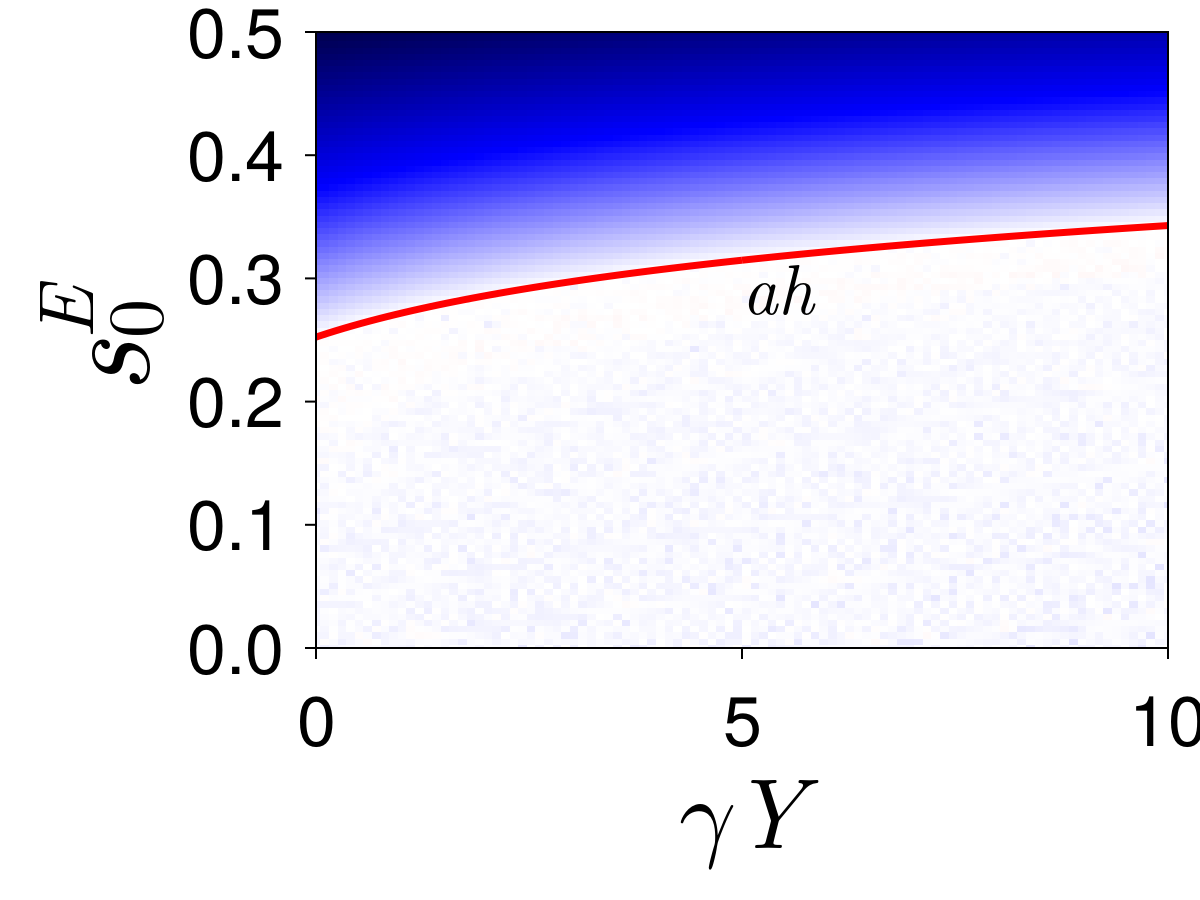

In [5]:
index = 1
absmax = maximum(abs.(Λs[:, :, index]))

mn, mx =  -absmax, absmax

CairoMakie.activate!()
f = Figure()
ticksize = 35
tickpad = 10.0
textsize = 30
textsizecurve = 35
lw = 3.5
mksize = 12

ax = Axis(f[1, 1], xlabel = L"γY",ylabel = L"s_{0}^{E}", xlabelsize = 50, ylabelsize = 65,
            xticklabelsize = ticksize, yticklabelsize = ticksize,
            xgridvisible  = false, ygridvisible = false,
            xticklabelpad = tickpad, yticklabelpad = tickpad)

hm = heatmap!(ax, γYrange, s0Erange, Λs[:, :, index],
colormap = :seismic, colorrange = (mn, mx))
lines!(ax, Hopf_forward[7, :], Hopf_forward[6, :], color = :red, linewidth = lw)
lines!(ax, Hopf_backward[7, :], Hopf_backward[6, :], color = :red, linewidth = lw)
text!(ax, 5.0, 0.26, text = L"ah", fontsize = ticksize)

xlims!(ax, 0.0, 10.0)
ylims!(ax, 0.0, 0.5)
display(f);

In [6]:
pathtosave = "/home/sergey/MEGA/dynamical-systems/rate_model/images/maps/"
filename = "gammaY_s0E_params_from_tg_RK4.pdf"
fullpath = pathtosave * filename 
save(fullpath, f)

CairoMakie.Screen{PDF}
